In [53]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#build model file
import joblib

# Ignore warnings
import warnings

warnings.filterwarnings('ignore')

plt.style.use("seaborn-v0_8-pastel")

sns.set_theme(
    style="whitegrid",
    palette="pastel",
    context="notebook"
)

In [54]:
df = pd.read_csv("nepal_house_data.csv")

In [55]:
df.head()

,location,land_area_sqft,floors,bedrooms,bathrooms,windows,doors,cement_bags,rcc_structure,plumbing,electricity,land_cost,construction_cost,material_cost,total_price
0,Chitwan,1055,1,5,4,13,4,238,1,1,0,6857500,1899000,167460,9043960
1,Dhangadi,2779,2,6,3,9,8,253,1,1,1,15284500,10004400,181760,25670660
2,Pokhara,2018,1,6,2,11,8,405,1,0,0,18162000,3632400,252600,22047000
3,Pokhara,727,4,4,4,5,3,392,1,1,1,6543000,5234400,198640,12176040
4,Pokhara,1447,4,1,4,14,6,221,1,1,1,13023000,10418400,174820,23816220


In [56]:
#drop rcc_structure column
df = df.drop("rcc_structure", axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   location           1000 non-null   object
 1   land_area_sqft     1000 non-null   int64 
 2   floors             1000 non-null   int64 
 3   bedrooms           1000 non-null   int64 
 4   bathrooms          1000 non-null   int64 
 5   windows            1000 non-null   int64 
 6   doors              1000 non-null   int64 
 7   cement_bags        1000 non-null   int64 
 8   plumbing           1000 non-null   int64 
 9   electricity        1000 non-null   int64 
 10  land_cost          1000 non-null   int64 
 11  construction_cost  1000 non-null   int64 
 12  material_cost      1000 non-null   int64 
 13  total_price        1000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 109.5+ KB


In [58]:
df.describe()

,land_area_sqft,floors,bedrooms,bathrooms,windows,doors,cement_bags,plumbing,electricity,land_cost,construction_cost,material_cost,total_price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,1783.32400,2.517000,3.467000,2.482000,9.005000,5.12900,338.425000,0.49000,0.504000,1.330775e+07,8.040146e+06,201865.500000,2.164888e+07
std,696.19825,1.130924,1.716933,1.104036,3.202691,1.99558,91.084185,0.50015,0.500234,7.686120e+06,4.908555e+06,41585.304381,1.080656e+07
min,606.00000,1.000000,1.000000,1.000000,4.000000,2.00000,180.000000,0.00000,0.000000,2.428000e+06,1.092600e+06,107040.000000,3.876860e+06
25%,1184.75000,1.000000,2.000000,2.000000,6.000000,3.00000,259.750000,0.00000,0.000000,7.396750e+06,4.043250e+06,169005.000000,1.301385e+07
50%,1780.00000,3.000000,3.000000,2.000000,9.000000,5.00000,336.500000,0.00000,1.000000,1.122000e+07,7.027200e+06,201590.000000,2.003528e+07
75%,2381.50000,4.000000,5.000000,3.000000,12.000000,7.00000,416.000000,1.00000,1.000000,1.755975e+07,1.099575e+07,234900.000000,2.844340e+07
max,3000.00000,4.000000,6.000000,4.000000,14.000000,8.00000,500.000000,1.00000,1.000000,3.583200e+07,2.142000e+07,293480.000000,5.736834e+07


In [59]:
nums_col = df.select_dtypes(include=["int64", "float64"]).columns
cat_col = df.select_dtypes(include=["object"]).columns

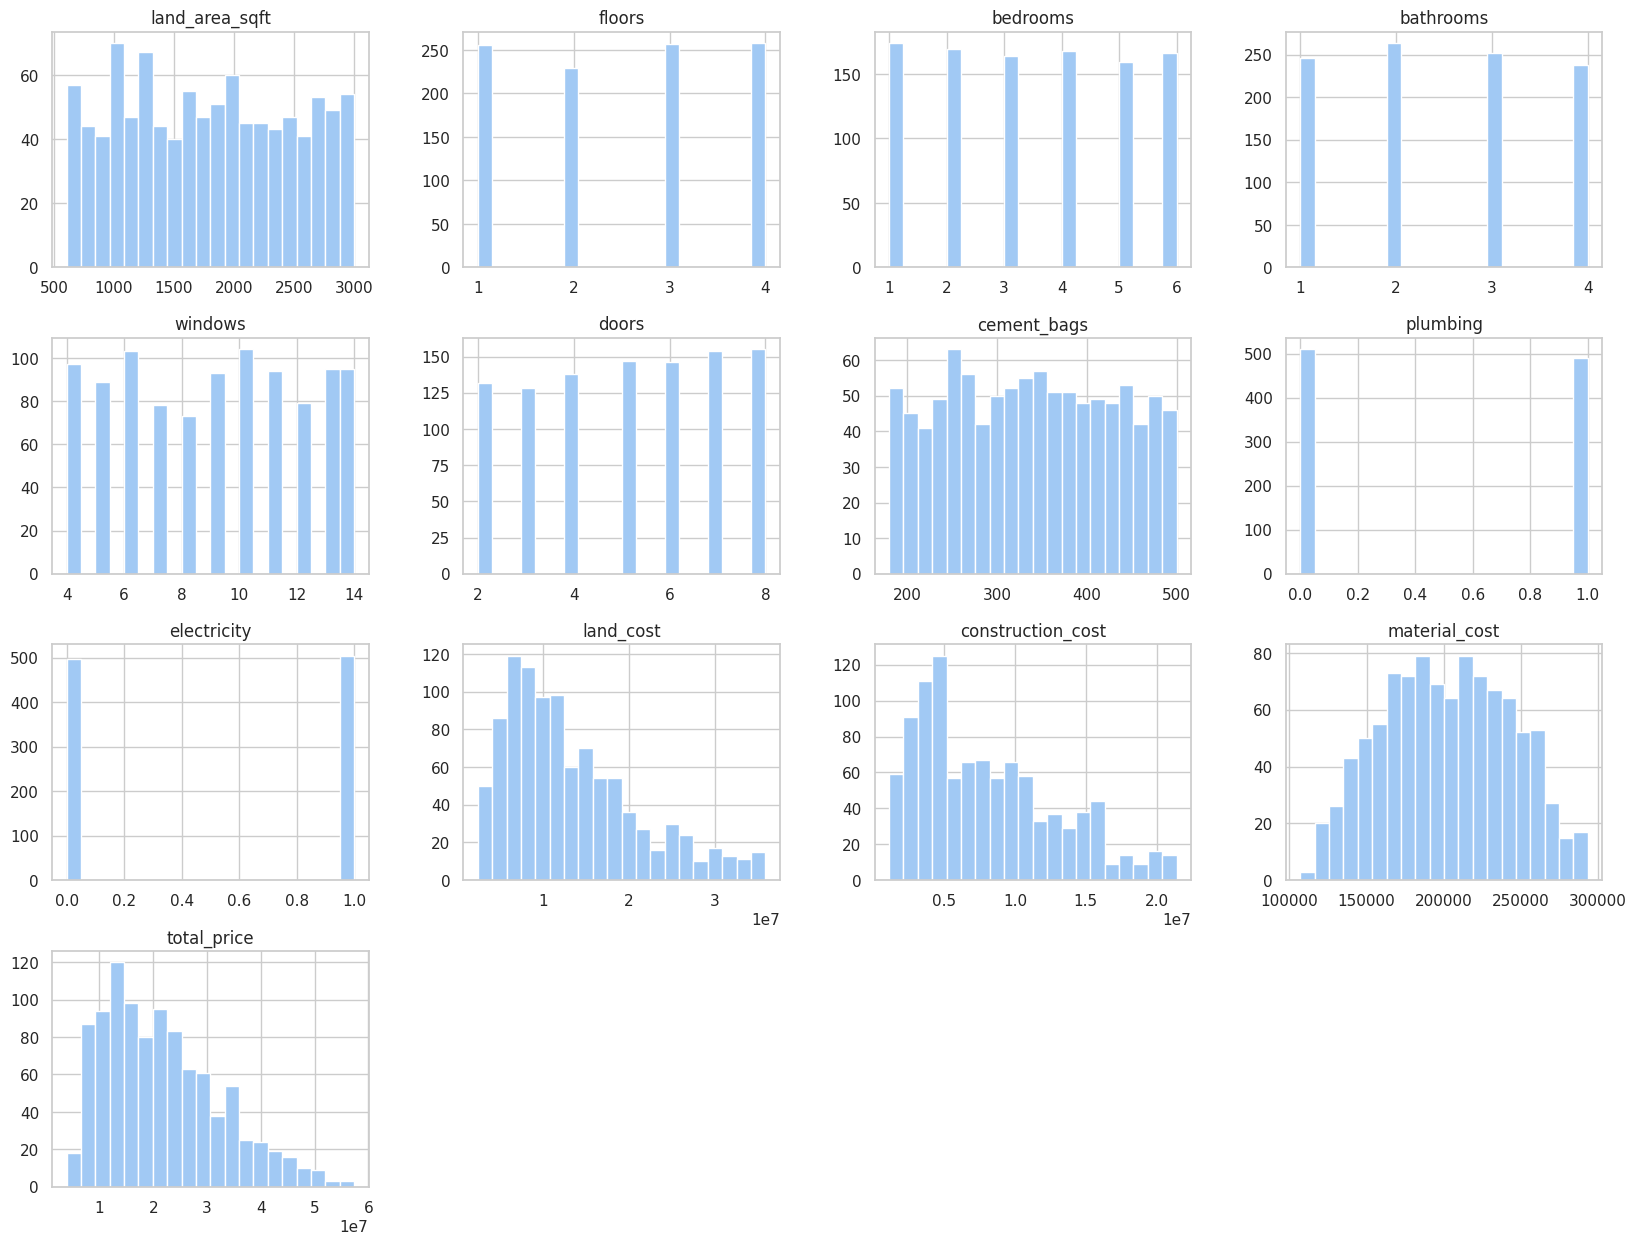

In [60]:
df[nums_col].hist(bins=20, figsize=(20, 15))
plt.show()

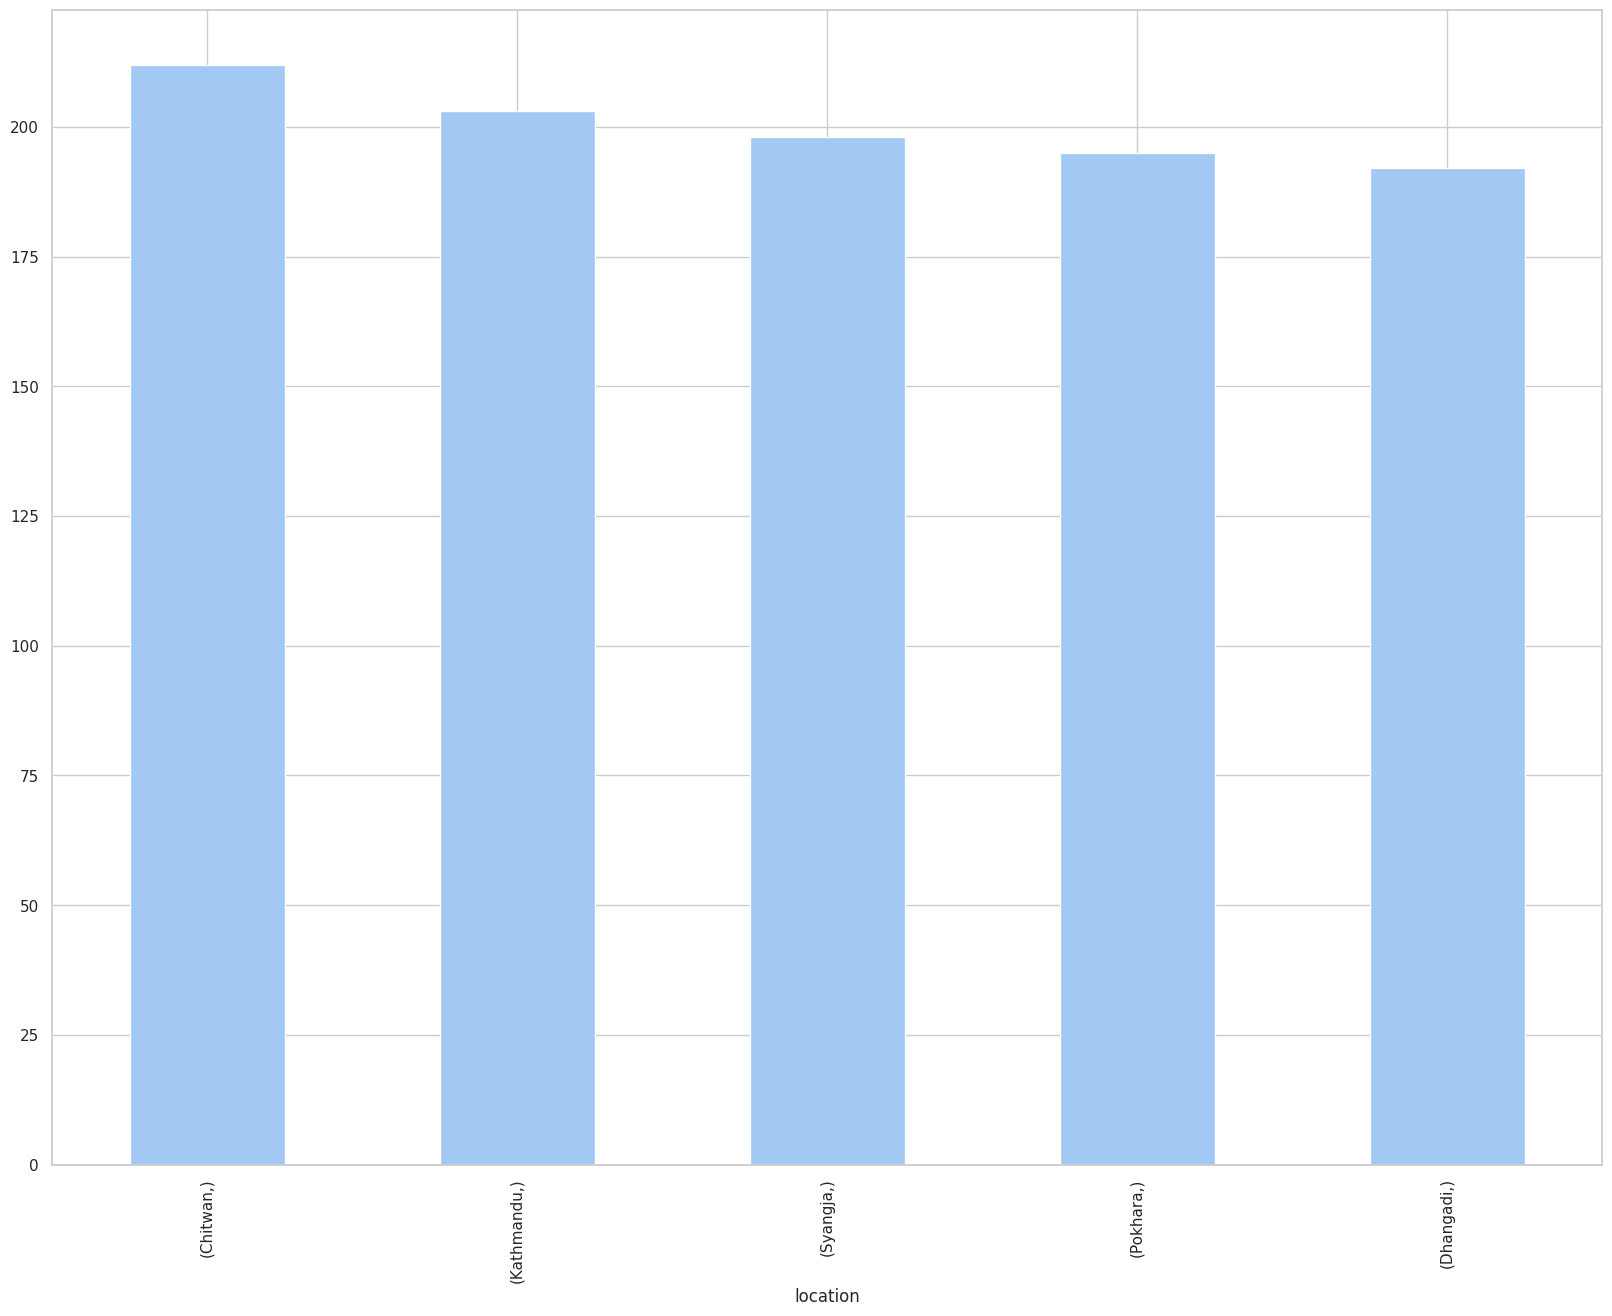

In [61]:
df[cat_col].value_counts().plot(kind="bar", figsize=(20, 15))
plt.show()

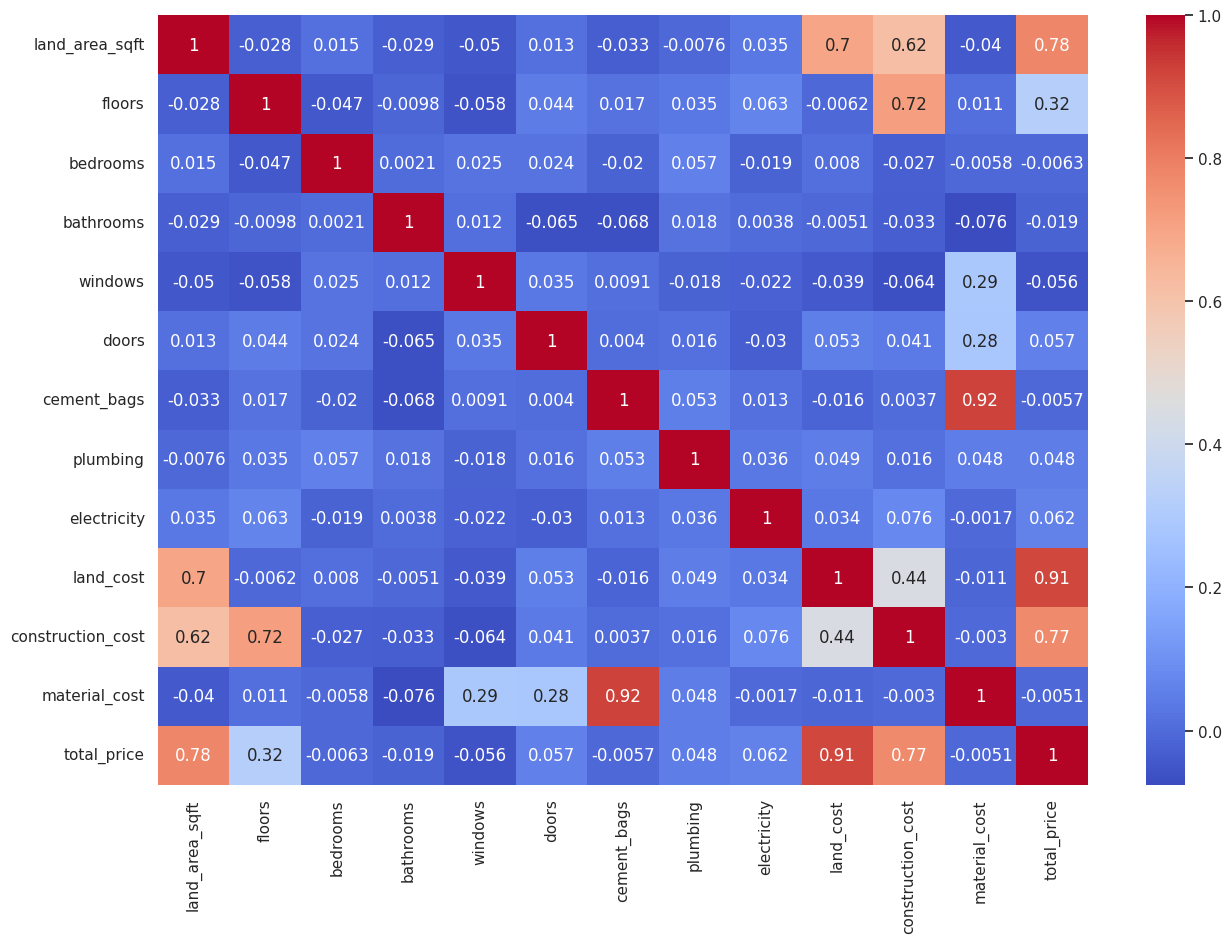

In [62]:
correlation = df[nums_col].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

In [63]:
#encode the location column
le = LabelEncoder()
df["location"] = le.fit_transform(df["location"])

In [64]:
X = df.drop("total_price", axis=1)
y = df["total_price"]

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
linReg = LinearRegression()
linReg.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [68]:
linRegPred = linReg.predict(X_test_scaled)

In [69]:
logReg = LogisticRegression()
logReg.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [70]:
logRegPred = logReg.predict(X_test_scaled)

In [71]:
# liner Reg model eval
print("Linear Regression")
print("MAE:",mean_absolute_error(y_test,linRegPred))
print("MSE:",mean_squared_error(y_test,linRegPred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,linRegPred)))
print("R2:",r2_score(y_test,linRegPred))

Linear Regression
MAE: 1.2097880244255066e-08
MSE: 2.2501098206895166e-16
RMSE: 1.5000366064498283e-08
R2: 1.0


In [72]:
#logistic Reg model eval
print("Logistic Regression")
print("MAE:",mean_absolute_error(y_test,logRegPred))
print("MSE:",mean_squared_error(y_test,logRegPred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,logRegPred)))
print("R2:",r2_score(y_test,logRegPred))

Logistic Regression
MAE: 3778025.7
MSE: 23209597266222.0
RMSE: 4817633.990479351
R2: 0.7705436763086931
